3.04


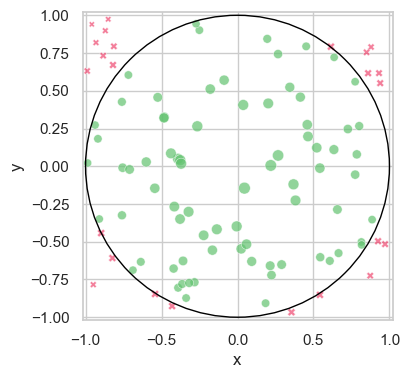

In [2]:
import seaborn as sb
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iterations = 100
np.random.seed(42)

df = pd.DataFrame(columns =["x","y","out_of_bounds","radius","one_minus_radius"])
# Pandas screams at us for not casting the column to a bool type for some reason? This fixes that even though it causes no issues... I miss type safety in rust :(
df["out_of_bounds"]=df["out_of_bounds"].astype(bool)

# main loop which:
# 1. produces a point at uniformly random (x,y) coordinates
# 2. calculates the distance from (0,0) to that point, as well as one minus that distance (for style)
# 3. appends a new row to our dataframe, marking it as in or out of bounds
# points which are at a distance greater than 1 (the radius of our circle) are known to be outside the circle
index=0
for e in range(0, iterations):
    x=np.random.uniform(-1,1)
    y=np.random.uniform(-1,1)
    
    dist = np.linalg.norm([x,y])
    
    row_to_append = pd.DataFrame([{"x":x, "y":y, "out_of_bounds": False if dist < 1 else True, "one_minus_radius": 1-dist, "radius": dist}])
    df = pd.concat([df,row_to_append])
    
    index+=1

mambajamba = df["out_of_bounds"].value_counts()[False]/iterations
print(mambajamba*4)

# plot
circle = plt.Circle(xy=(0, 0), radius=1, color="black", fill=False)
x1 = sb.scatterplot(x="x", y="y", data=df, alpha=0.7, hue="out_of_bounds", size="one_minus_radius", style="out_of_bounds")
x1.add_patch(circle)

# plot/seaborn settings
x1.set(xlim=(-1.02, 1.02))
x1.set(ylim=(-1.02, 1.02))
x1.legend([],[], frameon=False)
sb.set(style='whitegrid', rc={"figure.figsize":(4, 4)})
sb.set_palette(['#62C370', '#EF476F'])